Which merchant has the highest total purchase value?


In [59]:
#IMPORT IMPORTANT LIBRARIES

import pandas as pd
import matplotlib.pyplot as plt


#IMPORT THE DATAFRAME

money_df = pd.read_csv("Money.csv")

money_df.head()


,MERCHANT_CATEGORIZED_AT,HOURS,MONTHS,MINUTES,YEAR,MERCHANT_NAME,MERCHANT_CATEGORIZED_AS,PURCHASE_VALUE,PURCHASED_AT,IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY,USER_AGE,USER_GENDER,USER_HOUSEHOLD,USER_INCOME,USER_ID,Transaction_ID
0,2022-05-04 10:25:50.588042+00,10,5,25,2022,UONSDA CHURCH MOGERE MWAYO TITHE,Rent / Mortgage,1700,2022-05-04 13:56:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_04mk78fa
1,2021-10-25 16:18:38.586837+00,16,10,18,2021,PARK N GO,Transport & Fuel,100,2021-10-24 14:12:00+00,False,25.0,Female,4,90000,ID_U9WZMGJZ,ID_04xkfb07
2,2022-05-20 14:17:30.917297+00,14,5,17,2022,SAFARICOM OFFERS TUNUKIWA,Data & WiFi,20,2022-05-27 12:46:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_051urwuw
3,2022-04-12 15:59:14.139347+00,15,4,59,2022,ZILLIONS CREDIT LIMITED,Loan Repayment,3800,2022-02-07 12:16:00+00,False,NaN,Male,5,252000,ID_3JA0MAFB,ID_0e1om7rz
4,2022-05-04 10:24:26.709045+00,10,5,24,2022,MICHAEL MUSEMBI,Bills & Fees,60,2022-05-04 15:28:00+00,False,NaN,Male,3,10000,ID_ZX4DCF4K,ID_0kfcoawb


In [6]:
money_df.columns

Index(['MERCHANT_CATEGORIZED_AT', 'HOURS', 'MONTHS', 'MINUTES', 'YEAR',
       'MERCHANT_NAME', 'MERCHANT_CATEGORIZED_AS', 'PURCHASE_VALUE',
       'PURCHASED_AT', 'IS_PURCHASE_PAID_VIA_MPESA_SEND_MONEY', 'USER_AGE',
       'USER_GENDER', 'USER_HOUSEHOLD', 'USER_INCOME', 'USER_ID',
       'Transaction_ID'],
      dtype='object')

In [63]:
#PULL THE DATA TO BE USED
## We need to check which merchant has the highest purchase value

#APPROACH: Use groupby() function to group MERCHANT_CATEGORIZED_AS by PURCHASE_VALUE
## Use sum to get the total value of transactions made my each merchant

grouped_df = money_df.groupby("MERCHANT_NAME")["PURCHASE_VALUE"].sum()

grouped_df  = pd.DataFrame(grouped_df)

# Convert Series to DataFrame
#df = grouped_df.to_frame().reset_index

grouped_df


,PURCHASE_VALUE
MERCHANT_NAME,
AGGREY MWANGALE,1200
ALBERT MBOGO,2110
ALCHEMIIST - LEGEND BAR,2350
APS ABC PARKING,50
ARNELLE OMONDI,500
...,...
WANZA SEKETA,20
WINTA WOLDEGABRIEL +254795225400,300
ZILLIONS CREDIT LIMITED,5800


In [61]:
#INDEX THE MAXIMUM VALUE

# Find the index of the maximum purchase value
max_merchant_name = grouped_df.idxmax()

print(f"Merchant with Maximum Value is: {max_merchant_name}")


Merchant with Maximum Value is: M-SHWARI ACCOUNT


In [80]:
# Find which MERCHANT has Highest Purchase Value

filtered_group_df = grouped_df[grouped_df["PURCHASE_VALUE"]  > 0.4 * grouped_df["PURCHASE_VALUE"].max()]
sorted_df= filtered_group_df.sort_values(by = "PURCHASE_VALUE", ascending=False)
sorted_df

,PURCHASE_VALUE
MERCHANT_NAME,
M-SHWARI ACCOUNT,164150
AUDRINE MAKAKA,150000
NCBA BANK,130000
JERUSA A OTIENO,115000
CARREFOUR SRT,84009
EQUITY PAYBILL ACCOUNT,80000
JIMMIE WAIRIMU,80000
IM BANK C2B,75800
LIPA KARO KCB ACCOUNT,71000


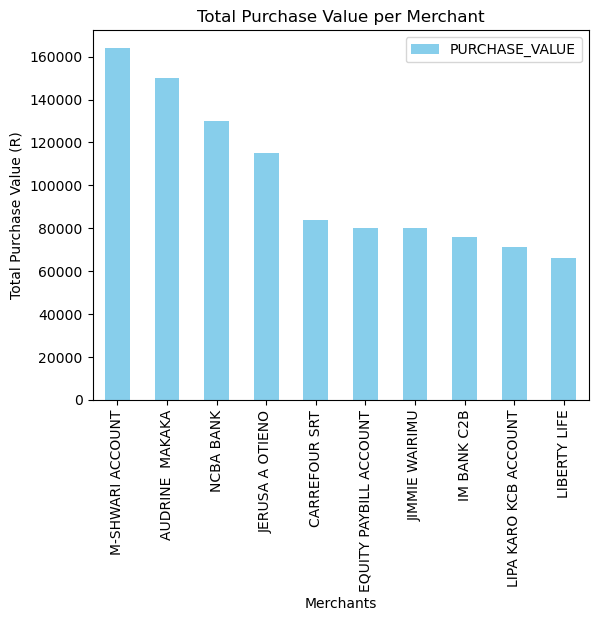

In [82]:
# Plot a Bar Graph

sorted_df.plot(kind = "bar", color = "skyblue")
plt.ylabel("Total Purchase Value (R)")
plt.xlabel("Merchants")
plt.title("Total Purchase Value per Merchant")
plt.show()
